In [21]:
%%html

<img src="https://cdn.vox-cdn.com/thumbor/ScXzGQ8lrcWwmyFEyuCWvqtTjPE=/0x0:2040x1360/1200x628/filters:focal(1020x680:1021x681)/cdn.vox-cdn.com/uploads/chorus_asset/file/23951360/STK072_VRG_Illo_N_Barclay_8_netflix.jpg">

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt
import requests

from api_keys import geoapify_key

#citipy to determine the cities based on latitude and longitude
from citipy import citipy



In [23]:
geoapify_key = "2f7113d4b5a54c1e9febed960d963e9a"

In [40]:
df=pd.read_csv("Resources/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [45]:
type=df["type"].value_counts()
type

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

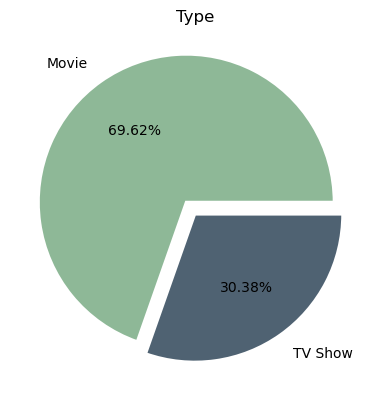

In [46]:
colors = ['#8EB897','#4F6272']
explode= [0.1, 0]
plt.pie(type,labels=type.index,labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },explode=explode, colors=colors, autopct='%0.2f%%')
plt.title('Type')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [26]:
df_2=pd.read_csv("Resources/netflix_userbase.csv")
df_2

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [27]:
df=df.drop("show_id",axis=1)
df.head()

#also i think we dont need cast?  whats the point :)   OR duration and description ??? or all


#  THEN AFTER WE FIND ONE MORE CVS WE CAN MERGE IT !!!

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
#df_2=df_2.drop("User ID",axis=1)
#df_2.head()

In [29]:
df_2.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [30]:
subscription=df_2["Subscription Type"].value_counts()
subscription

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

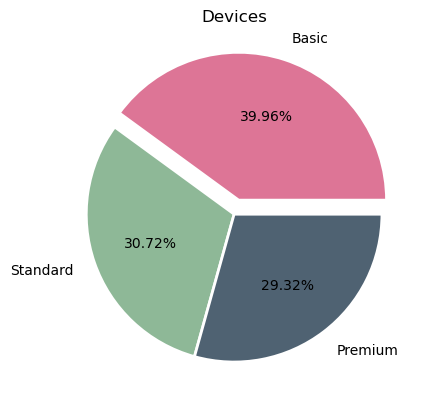

In [31]:
colors = ['#DD7596', '#8EB897','#4F6272']
explode= [0.1, 0, 0]
plt.pie(subscription,labels=subscription.index,labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },explode=explode, colors=colors, autopct='%0.2f%%')
plt.title('Devices')
plt.show()

In [32]:
device=df_2["Device"].value_counts()
device


Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

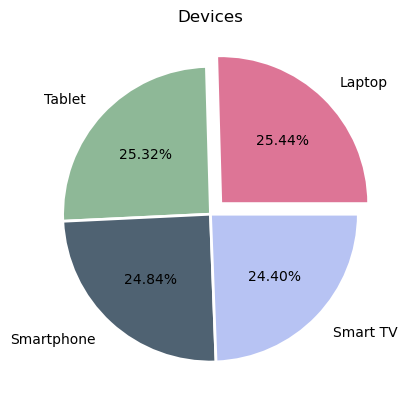

In [39]:
colors = ['#DD7596', '#8EB897','#4F6272', '#B7C3F3']
explode=[0.1, 0, 0, 0]
plt.pie(device,labels=device.index,labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },explode=explode, colors=colors, autopct='%0.2f%%')
plt.title('Devices')
plt.show()


In [34]:
gender=df_2["Gender"].value_counts()
gender

Gender
Female    1257
Male      1243
Name: count, dtype: int64

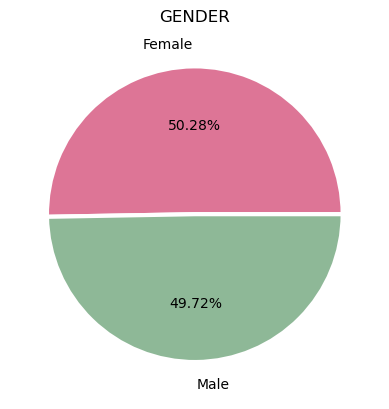

In [43]:
colors = ['#DD7596', '#8EB897']#4F6272', '#B7C3F3'

plt.pie(gender, labels=gender.index,labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=colors, autopct='%0.2f%%')
plt.title("GENDER")
plt.show()


In [36]:
country=df_2["Country"].value_counts()
country

Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

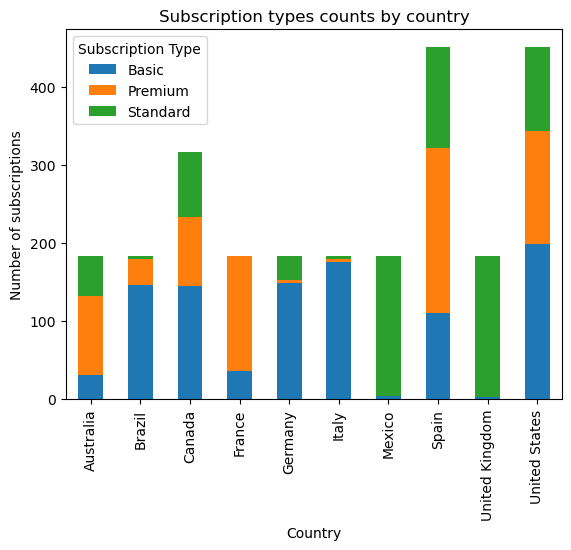

In [37]:
subscription_counts = df_2.groupby(['Country', 'Subscription Type'])['User ID'].count().unstack()
subscription_counts.plot(kind = 'bar',stacked = True)
plt.xlabel('Country')
plt.ylabel('Number of subscriptions')
plt.title('Subscription types counts by country')
plt.legend(title='Subscription Type')
plt.show()